# Segment 1: Import Necessary Libraries

In [10]:
import pandas as pd
import numpy as np
import re
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import sent_tokenize
from tqdm import tqdm

import spacy
if spacy.prefer_gpu():
    print("GPU is being used!")
else:
    print("GPU is not being used.")


GPU is being used!


# Segment 2: Load and Inspect the Dataset

In [11]:
# Load the data into a string format
with open('/kaggle/input/data-nlp/cleaned_merged_fairy_tales_without_eos.txt', 'r') as file:
    fairy_tales_text = file.read()

# Inspecting the first 1000 characters
fairy_tales_text[:1000]

'The Happy Prince.\nHIGH above the city, on a tall column, stood the statue of the Happy Prince.  He was gilded all over with thin leaves of fine gold, for eyes he had two bright sapphires, and a large red ruby glowed on his sword-hilt.\nHe was very much admired indeed.  “He is as beautiful as a weathercock,” remarked one of the Town Councillors who wished to gain a reputation for having artistic tastes; “only not quite so useful,” he added, fearing lest people should think him unpractical, which he really was not.\n“Why can’t you be like the Happy Prince?” asked a sensible mother of her little boy who was crying for the moon.  “The Happy Prince never dreams of crying for anything.”\n“I am glad there is some one in the world who is quite happy,” muttered a disappointed man as he gazed at the wonderful statue.\n“He looks just like an angel,” said the Charity Children as they came out of the cathedral in their bright scarlet cloaks and their clean white pinafores.\n“How do you know?” sai

# Segment 3: Preprocessing the Text Data

- Removing unwanted characters (punctuation, special characters, etc.)
- Tokenizing text (splitting into words)


In [12]:
def calculate_metrics(text):
    words = word_tokenize(text)
    unique_words = set(words)
    sentences = sent_tokenize(text)
    
    # Calculate metrics
    total_word_count = len(words)
    unique_word_count = len(unique_words)
    avg_word_length = np.mean([len(word) for word in words])
    avg_sentence_length = total_word_count / len(sentences)
    stop_words_set = set(stopwords.words('english'))
    stop_words = [word for word in words if word in stop_words_set]
    stop_words_percentage = (len(stop_words) / total_word_count) * 100

    return total_word_count, unique_word_count, avg_word_length, avg_sentence_length, stop_words_percentage

before_metrics = calculate_metrics(fairy_tales_text)
print("Metrics Before Cleaning:")
print(f"Total Word Count: {before_metrics[0]}")
print(f"Unique Word Count: {before_metrics[1]}")
print(f"Average Word Length: {before_metrics[2]:.2f}")
print(f"Average Sentence Length: {before_metrics[3]:.2f}")
print(f"Stop Words Percentage: {before_metrics[4]:.2f}%")


def clean_text(text):
    # Remove non-alphabetical characters (e.g., punctuation and digits)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = text.lower()
    return text


cleaned_text = clean_text(fairy_tales_text)
after_metrics = calculate_metrics(cleaned_text)
print("\nMetrics After Cleaning:")
print(f"Total Word Count: {after_metrics[0]}")
print(f"Unique Word Count: {after_metrics[1]}")
print(f"Average Word Length: {after_metrics[2]:.2f}")
print(f"Average Sentence Length: {after_metrics[3]:.2f}")
print(f"Stop Words Percentage: {after_metrics[4]:.2f}%")


Metrics Before Cleaning:
Total Word Count: 4541709
Unique Word Count: 69154
Average Word Length: 3.67
Average Sentence Length: 23.95
Stop Words Percentage: 40.11%

Metrics After Cleaning:
Total Word Count: 3790744
Unique Word Count: 54784
Average Word Length: 4.17
Average Sentence Length: 3790744.00
Stop Words Percentage: 52.58%


# Segment 4: Remove Stopwords and Perform Word Frequency Analysis
- Stopwords are common words (e.g., "the", "is", "in") that don’t add significant meaning.

In [13]:
def remove_punctuation(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.isalpha()]
    cleaned_text = " ".join(filtered_tokens)
    return cleaned_text, filtered_tokens

total_word_count_before = len(word_tokenize(fairy_tales_text))

cleaned_text, filtered_tokens = remove_punctuation(fairy_tales_text)

total_word_count_after = len(filtered_tokens)

print("Cleaned Text (first 500 characters):")
print(cleaned_text[:500])
print("\nTotal Word Count Before Removing Punctuation:", total_word_count_before)
print("Total Word Count After Removing Punctuation:", total_word_count_after)

print("\nFirst 10 tokens after punctuation removal:")
print(filtered_tokens[:10])

after_punctuation_metrics = calculate_metrics(cleaned_text)

print("\nMetrics After Removing Punctuation:")
print(f"Total Word Count: {after_punctuation_metrics[0]}")
print(f"Unique Word Count: {after_punctuation_metrics[1]}")
print(f"Average Word Length: {after_punctuation_metrics[2]:.2f}")
print(f"Average Sentence Length: {after_punctuation_metrics[3]:.2f}")
print(f"Stop Words Percentage: {after_punctuation_metrics[4]:.2f}%")


Cleaned Text (first 500 characters):
The Happy Prince HIGH above the city on a tall column stood the statue of the Happy Prince He was gilded all over with thin leaves of fine gold for eyes he had two bright sapphires and a large red ruby glowed on his He was very much admired indeed He is as beautiful as a weathercock remarked one of the Town Councillors who wished to gain a reputation for having artistic tastes only not quite so useful he added fearing lest people should think him unpractical which he really was not Why can t you

Total Word Count Before Removing Punctuation: 4541709
Total Word Count After Removing Punctuation: 3755265

First 10 tokens after punctuation removal:
['The', 'Happy', 'Prince', 'HIGH', 'above', 'the', 'city', 'on', 'a', 'tall']

Metrics After Removing Punctuation:
Total Word Count: 3755265
Unique Word Count: 51594
Average Word Length: 4.11
Average Sentence Length: 3755265.00
Stop Words Percentage: 48.51%


In [14]:
stop_words = set(stopwords.words('english'))

tokens = word_tokenize(cleaned_text)
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

word_freq_after_stopwords = Counter(filtered_tokens)

print("\nMost Common Words After Removing Stopwords:")
print(word_freq_after_stopwords.most_common(10))

filtered_text = " ".join(filtered_tokens)

after_stopwords_metrics = calculate_metrics(filtered_text)
print("\nMetrics After Removing Stopwords:")
print(f"Total Word Count: {after_stopwords_metrics[0]}")
print(f"Unique Word Count: {after_stopwords_metrics[1]}")
print(f"Average Word Length: {after_stopwords_metrics[2]:.2f}")
print(f"Average Sentence Length: {after_stopwords_metrics[3]:.2f}")
print(f"Stop Words Percentage: {after_stopwords_metrics[4]:.2f}%")


Most Common Words After Removing Stopwords:
[('said', 22653), ('one', 13113), ('would', 10713), ('little', 10513), ('could', 9525), ('like', 7146), ('came', 7045), ('man', 7041), ('time', 6811), ('see', 6545)]

Metrics After Removing Stopwords:
Total Word Count: 1733666
Unique Word Count: 51196
Average Word Length: 5.58
Average Sentence Length: 1733666.00
Stop Words Percentage: 0.00%


# Segment 5: Visualizing Word Frequencies
We can create a bar chart and a word cloud to visualize the most frequent words.

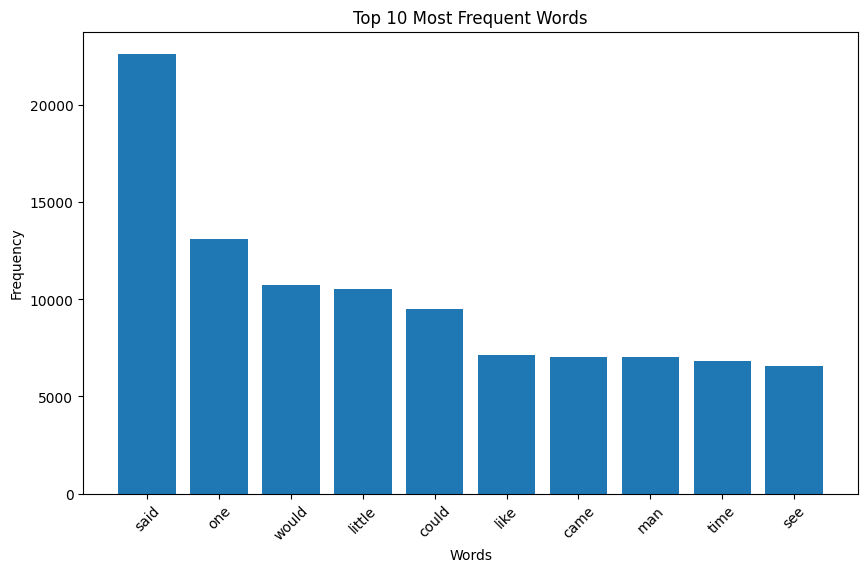

In [15]:
tokens = word_tokenize(filtered_text)
word_freq = Counter(tokens)
top_10_words = word_freq.most_common(10)
words, counts = zip(*top_10_words)

plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Words')
plt.xticks(rotation=45)
plt.show()

# Segment 6: Word Cloud Visualization
- A word cloud can give a more intuitive view of word frequencies

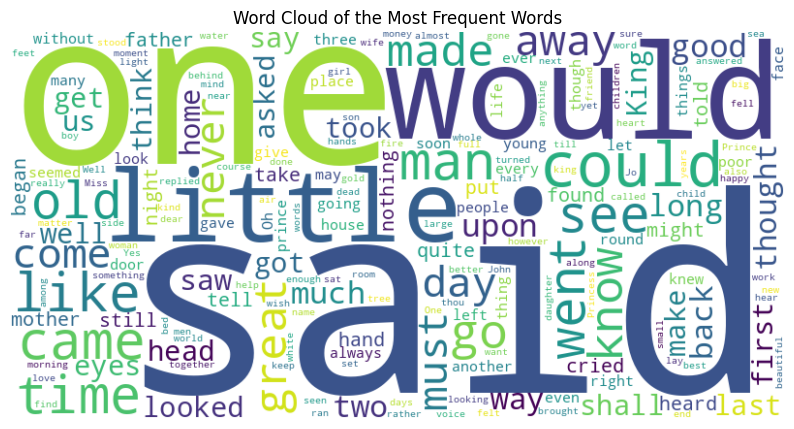

In [16]:
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of the Most Frequent Words')
plt.show()


# Segment 7: Length of Stories Analysis
- Analyzing the length of each fairy tale in terms of word count.

In [17]:
from spacy.cli import download
download("en_core_web_md")
nlp = spacy.load("en_core_web_md")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [3]:
chunk_size = 1000000
chunks = [fairy_tales_text[i:i+chunk_size] for i in range(0, len(fairy_tales_text), chunk_size)]

def identify_titles_in_chunks(chunks):
    titles = []
    for chunk in chunks:
        doc = nlp(chunk)
        for ent in doc.ents:
            if ent.label_ in ['WORK_OF_ART', 'ORG']:
                titles.append(ent.text)
    return titles

titles = identify_titles_in_chunks(chunks)
titles = sorted(set(titles), key=lambda title: fairy_tales_text.find(title))
print("Identified Titles:")
print(titles)

stories = re.split(r'(' + '|'.join(map(re.escape, titles)) + r')', fairy_tales_text)
stories = [story.strip() for story in stories if story.strip() and story not in titles]

story_lengths = [len(story.split()) for story in stories]

average_story_length = sum(story_lengths) / len(story_lengths) if story_lengths else 0

print(f"Average Story Length: {average_story_length:.2f} words")

Average Story Length: 620.65 words


# Segment 8: Visualizing Story Lengths

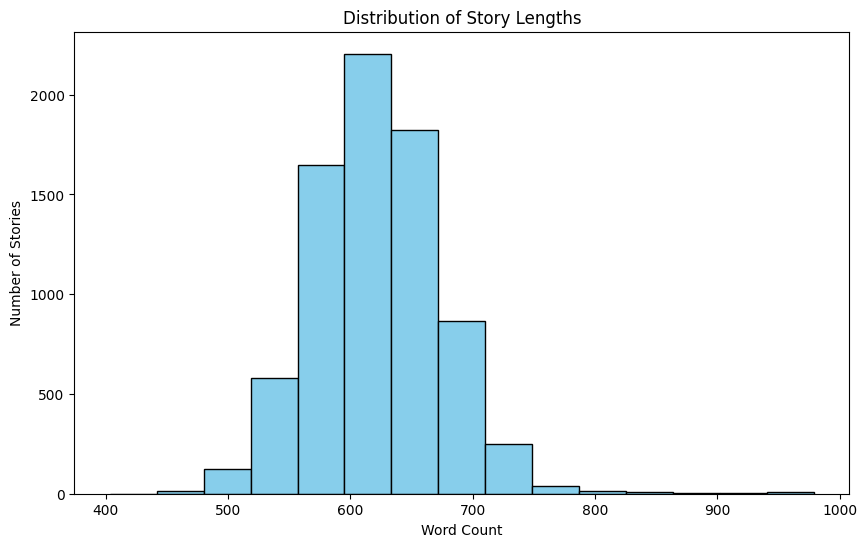

In [5]:
# Plotting a histogram of story lengths
plt.figure(figsize=(10, 6))
plt.hist(story_lengths, bins=15, color='skyblue', edgecolor='black')
plt.title('Distribution of Story Lengths')
plt.xlabel('Word Count')
plt.ylabel('Number of Stories')
plt.show()

# Segment 9: Insights